# UFCFVQ-15-M Programming for Data Science (Autumn 2021)
# Programming Task 2

## Student Id: 21050307

### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame 

In [57]:
#declaring libraries/external modules
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import statsmodels.formula.api as stat
sb.set()

# reading two csv files 
data1 = pd.read_csv('task2a.csv') 
data2 = pd.read_csv('task2b.csv') 
  
# using merge function by setting how='inner' and on similar columns region 
df1 = pd.merge(data1, data2,  
                   on='region',  
                   how='inner') 

print(df1)

    region  median_household_income  share_unemployed_seasonal  \
0        1                    42278                      0.060   
1        2                    67629                      0.064   
2        3                    49254                      0.063   
3        4                    44922                      0.052   
4        5                    60487                      0.059   
5        6                    60940                      0.040   
6        7                    70161                      0.052   
7        8                    57522                      0.049   
8        9                    68277                      0.067   
9       10                    46140                      0.052   
10      11                    49555                      0.058   
11      12                    71223                      0.034   
12      13                    53438                      0.042   
13      14                    54916                      0.054   
14      15

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Clean the merged data

In [58]:
df2= df1.dropna() # drop null values

df3 = df2.drop('share_voters_voted_to_the_right', axis=1) #drop column
print (df3)


    region  median_household_income  share_unemployed_seasonal  \
0        1                    42278                      0.060   
1        2                    67629                      0.064   
2        3                    49254                      0.063   
3        4                    44922                      0.052   
4        5                    60487                      0.059   
5        6                    60940                      0.040   
6        7                    70161                      0.052   
7        8                    57522                      0.049   
8        9                    68277                      0.067   
9       10                    46140                      0.052   
10      11                    49555                      0.058   
12      13                    53438                      0.042   
13      14                    54916                      0.054   
14      15                    48060                      0.044   
15      16

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the effects of household income on levels of bias crimes

[Text(0.5, 1.0, 'After outliers are removed')]

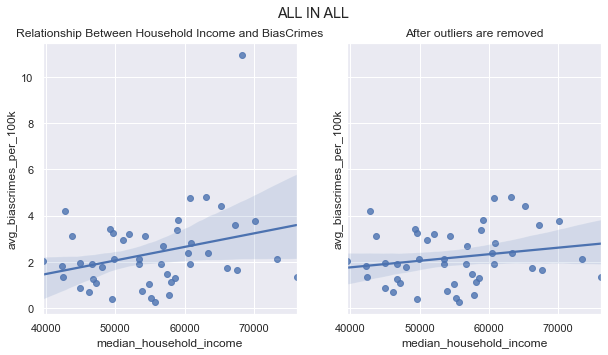

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('ALL IN ALL')

sb.set_style('whitegrid')
sb.regplot( data=df3, x="median_household_income", y="avg_biascrimes_per_100k", ax=axes[0]).set(title='Relationship Between Household Income and BiasCrimes')


'''
This plot shows low significant correlation between median house hold income and average bias crime 
as there is a rise and fall in biascrimes as we move from left to right
In the plot, it is shown there is one outlier
'''

df4 = df3.drop(df3[df3['avg_biascrimes_per_100k']>5.5].index, axis ='index')

sb.regplot( data=df4, x="median_household_income", y="avg_biascrimes_per_100k", ax=axes[1]).set(title='After outliers are removed')



'\ntaking a broader look at the graph after outliers are removed, we can see it does not affect the readings\n'

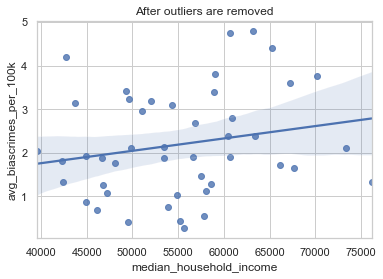

In [65]:

df4 = df3.drop(df3[df3['avg_biascrimes_per_100k']>5.5].index, axis ='index')

sb.regplot( data=df4, x="median_household_income", y="avg_biascrimes_per_100k").set(title='After outliers are removed')

'''
taking a broader look at the graph after outliers are removed, we can see it does not affect the readings
for further analysis, we would be taking a hypothesis test to find out the correlation and p-vaue to determine 
if there is a stronger relationship
'''



<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Test the hypothesis that household income has no effect on levels of bias crime

In [66]:
statistics = stat.ols('median_household_income ~ avg_biascrimes_per_100k',df3).fit()
print(statistics.summary())

df3[['median_household_income', 'avg_biascrimes_per_100k']].corr()



                               OLS Regression Results                              
Dep. Variable:     median_household_income   R-squared:                       0.088
Model:                                 OLS   Adj. R-squared:                  0.067
Method:                      Least Squares   F-statistic:                     4.316
Date:                     Sun, 30 Jan 2022   Prob (F-statistic):             0.0435
Time:                             13:11:27   Log-Likelihood:                -491.01
No. Observations:                       47   AIC:                             986.0
Df Residuals:                           45   BIC:                             989.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

,median_household_income,avg_biascrimes_per_100k
median_household_income,1.000000,0.295819
avg_biascrimes_per_100k,0.295819,1.000000


In [ ]:
'''
My two hypothesis;
Ho: No relationship between variables
Hi: A level of relationship between variables

According to the regression summary below, it is shown that the correlation coefficient is 0.296. This shows that
there is a weak linear relationship between the two variables

With P-value been 0.044 which is below 0.05(my significant level), this adequately rejects my null hypothesis 
and states that there is a relationship between the two variables however weak
'''

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of urbanisation on levels of bias crimes

'\nThis plot shows low significant correlation between between median house hold income and average bias crime\nIn the plot, it is shown there is one outlier\n'

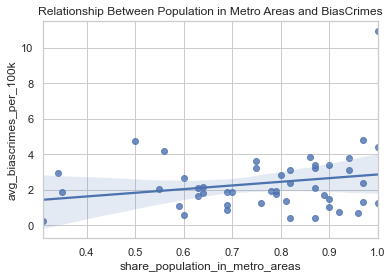

In [68]:
sb.set_style('whitegrid')
sb.regplot( data=df3, x="share_population_in_metro_areas", y="avg_biascrimes_per_100k").set(title='Relationship Between Population in Metro Areas and BiasCrimes')


'''
This plot shows no significant correlation between between median house hold income and average bias crime
as there is a rise and fall in biascrimes as we move from left to right
In the plot, it is shown there is one outlier
'''


'\ntaking a broader look at the graph after outliers are removed, we can see it does not affect the readings\n'

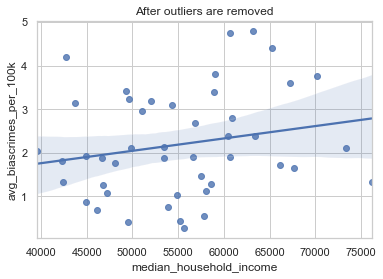

In [70]:

df4 = df3.drop(df3[df3['avg_biascrimes_per_100k']>6].index, axis ='index')

sb.regplot( data=df4, x="median_household_income", y="avg_biascrimes_per_100k").set(title='After outliers are removed')

'''
taking a broader look at the graph after outliers are removed, we can see it does not affect the readings
for further analysis, we would be taking a hypothesis test to find out the correlation and p-vaue to determine 
if there is any correlation
'''




<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR14 - Test the hypothesis that urbanisation has a significant effect on levels of bias crimes

In [53]:
statistics = stat.ols('share_population_in_metro_areas ~ avg_biascrimes_per_100k',df3).fit() 
print(statistics.summary())

df3[['share_population_in_metro_areas', 'avg_biascrimes_per_100k']].corr()


                                   OLS Regression Results                                  
Dep. Variable:     share_population_in_metro_areas   R-squared:                       0.044
Model:                                         OLS   Adj. R-squared:                  0.023
Method:                              Least Squares   F-statistic:                     2.065
Date:                             Sun, 30 Jan 2022   Prob (F-statistic):              0.158
Time:                                     00:05:05   Log-Likelihood:                 16.193
No. Observations:                               47   AIC:                            -28.39
Df Residuals:                                   45   BIC:                            -24.69
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                              coef    std err          t      P>|t|      [0.025 

,share_population_in_metro_areas,avg_biascrimes_per_100k
share_population_in_metro_areas,1.000000,0.209463
avg_biascrimes_per_100k,0.209463,1.000000


In [ ]:
'''
My two hypothesis;
Ho: No relationship between variables
Hi: A level of relationship between variables

According to the regression summary below, it is shown that the correlation coefficient is 0.210. This shows that
there is a weak linear relationship between the two variables

With P-value been 0.158 which is above 0.05(my significant level), this adequately accepts my null hypothesis 
and states that there is no adequate relationship between the two variables
'''

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Task 2


# Development Process Report

This is similar to task1, but having the option of using libraries and modules. nFor the first two questions, I had considered purley using 
csv reader or hardcoding it to enhance my experience, but because of time, i had decided to forgo it and use pandas and other visualization tool.

On using the describe() from pandas, i quickly noticed that it mirrored what task1 was supposed to achieve. So in hindsight, hardcoding the first two questions wouldnt have proved difficult as i thought.

In the last 4 questions, exploratory analysis has to be done on the data. This involves the use of visualization to plot the graph to explain and also the use of statistics modules to analyze and find the P-value and correlation coefficient to see if there is any linear relationship between two variables. This is done in other to know if a dependent variable is determinded by the rise or fall of the independent variable. 


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>